# *EJERCICIO FINAL - Módulo 3*  
##### Raquel Castellanos

## _Fase 1: Exploración y Limpieza_

## 1.1. Exploración Inicial:
### Realizar una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.

In [66]:
#Importo las librerías que voy a usar a lo largo del ejercicio:
import pandas as pd
# -----------------------------------------------------------------------
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats

from scipy.stats import shapiro, levene, mannwhitneyu
from scipy.stats import ttest_ind, norm, chi2_contingency

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [67]:
#Cargo los dos CSV
df1= pd.read_csv("Customer Flight Activity.csv")
df2= pd.read_csv("Customer Loyalty History.csv")

In [68]:
#Veo info del primer CSV.
df1.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [69]:
#Con info me hace un pequeño resumen del df: columnas, tipos de datos, no nulos,...
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [70]:
#Veo info del segundo CSV.
df2.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [71]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

## 1.2 Utilizar funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.

In [72]:
#Creo funcion para explorar principales datos de los 2 dataframes:

def revision_inicial(dataframe):
    """" ""
    Esta función realiza un análisis exploratorio básico de un DataFrame, mostrando información sobre sus nombres de columnas,
    tamaño general, duplicados, valores nulos, tipos de datos, y estadísticas descriptivas para columnas categóricas y numéricas. 
    """
    
    print(f"Este dataframe cuenta con los siguientes nombres de columnas: \n{dataframe.columns}") 
    """Miro el nombre de las columnas"""

    print("-----\n")
    print(f"Los tipos de datos de sus columnas son:")
    display(pd.DataFrame(dataframe.dtypes, columns = ["Tipo_de_dato"]))

    """Con dtypes miro qué tipo de dato tiene cada columna"""

    print(f"Cuenta con {dataframe.shape[0]} FILAS, y {dataframe.shape[1]} COLUMNAS.")
    """Shape me devuelve una tupla con el numero de filas [0] y columnas [1]"""
    print("-----\n")

    print(f"Estos son los estadísticos de sus columnas numéricas:")
    display(dataframe.describe().T )
    """Con describe veo valores estadísticos de las columnas numéricas como la media, la mediana, la desv. estándar, o el mínimo entre otros."""
    try:
        print("Estos son los estadísticos de sus columnas categóricas:")
        display(dataframe.describe(include="O").T )
        for col in dataframe:
            print(f"La columa {col.upper()} tiene los siguientes valores únicos:\n {dataframe[col].unique()}")

        """Con describe include o de object, busco solo los estadísticos de las columnas categoricas, como sus valores únicos, las frecuencias de estos o cuál es el que más se repite por columna."""
    
    except:
        """Manejo esta excepción porque uno de los dataframes no tiene columnas categóricas."""
        print("NO tiene columnas categóricas.")
    
    print("-----\n")
    print(f"Cuenta con este total de nulos en cada columna:")
    display(pd.DataFrame(dataframe.isnull().sum(), columns= ["Nulos"]))
    
    print("-----\n")
    print(f"El numero total de DUPLICADOS es: {dataframe.duplicated().sum()}.")
        

In [73]:
#Aplico mi función al primer DF:
revision_inicial(df1)

Este dataframe cuenta con los siguientes nombres de columnas: 
Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')
-----

Los tipos de datos de sus columnas son:


,Tipo_de_dato
Loyalty Number,int64
Year,int64
Month,int64
Flights Booked,int64
Flights with Companions,int64
Total Flights,int64
Distance,int64
Points Accumulated,float64
Points Redeemed,int64
Dollar Cost Points Redeemed,int64


Cuenta con 405624 FILAS, y 10 COLUMNAS.
-----

Estos son los estadísticos de sus columnas numéricas:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


Estos son los estadísticos de sus columnas categóricas:
NO tiene columnas categóricas.
-----

Cuenta con este total de nulos en cada columna:


,Nulos
Loyalty Number,0
Year,0
Month,0
Flights Booked,0
Flights with Companions,0
Total Flights,0
Distance,0
Points Accumulated,0
Points Redeemed,0
Dollar Cost Points Redeemed,0


-----

El numero total de DUPLICADOS es: 1864.


In [74]:
#Aplico mi función al segundo DF:
revision_inicial(df2)

Este dataframe cuenta con los siguientes nombres de columnas: 
Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')
-----

Los tipos de datos de sus columnas son:


,Tipo_de_dato
Loyalty Number,int64
Country,object
Province,object
City,object
Postal Code,object
Gender,object
Education,object
Salary,float64
Marital Status,object
Loyalty Card,object


Cuenta con 16737 FILAS, y 16 COLUMNAS.
-----

Estos son los estadísticos de sus columnas numéricas:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


Estos son los estadísticos de sus columnas categóricas:


,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


La columa LOYALTY NUMBER tiene los siguientes valores únicos:
 [480934 549612 429460 ... 776187 906428 652627]
La columa COUNTRY tiene los siguientes valores únicos:
 ['Canada']
La columa PROVINCE tiene los siguientes valores únicos:
 ['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
La columa CITY tiene los siguientes valores únicos:
 ['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John's"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown']
La columa POSTAL CODE tiene los siguientes valores únicos:
 ['M2Z 4K1' 'T3G 6Y6' 'V6E 3D9' 'P1W 1K4' 'J8Y 3Z5' 'Y2K 6R0' 'P5S 6R4'
 'K8V 4B2' 'H2Y 2W2' 'M8Y 4K8' 'U5I 4F1' 'G1B 3L5' 'H4G 3T4' 'M2M 7K8'
 'M2M 6J7' 'E3B 2H

,Nulos
Loyalty Number,0
Country,0
Province,0
City,0
Postal Code,0
Gender,0
Education,0
Salary,4238
Marital Status,0
Loyalty Card,0


-----

El numero total de DUPLICADOS es: 0.


#### Como extra, algunas comprobaciones:

In [75]:
#Compruebo en mayor profundidad las columnas categóricas, que como he visto antes, solo están en el dataframe 2.
#Las selecciono y creo una variable para coger solo los nombres de las columnas, que después usaré para crear un for loop.
#Solo lo hago con el segundo dataframe, porque el primero tiene todas sus columnas numéricas.

df_cat= df2.select_dtypes(include="O")
columns_cat= df_cat.columns
columns_cat

Index(['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Marital Status', 'Loyalty Card', 'Enrollment Type'],
      dtype='object')

In [76]:
#Creo mi bucle for para ver mejor los valores unicos por columna categórica y cuánto se repiten:
for col in columns_cat: 
    print(col.upper()) #pongo nomnbre de cada columna en mayus para que se vea más claro
    print(df_cat[col].unique())
    print(df_cat[col].value_counts())
    print("------\nSiguiente columna:\n")

print("Estas son todas las columnas categóricas.")  

COUNTRY
['Canada']
Country
Canada    16737
Name: count, dtype: int64
------
Siguiente columna:

PROVINCE
['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
Province
Ontario                 5404
British Columbia        4409
Quebec                  3300
Alberta                  969
Manitoba                 658
New Brunswick            636
Nova Scotia              518
Saskatchewan             409
Newfoundland             258
Yukon                    110
Prince Edward Island      66
Name: count, dtype: int64
------
Siguiente columna:

CITY


['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John's"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown']
City
Toronto           3351
Vancouver         2582
Montreal          2059
Winnipeg           658
Whistler           582
Halifax            518
Ottawa             509
Trenton            486
Edmonton           486
Quebec City        485
Dawson Creek       444
Fredericton        425
Regina             409
Kingston           401
Tremblant          398
Victoria           389
Hull               358
West Vancouver     324
St. John's         258
Thunder Bay        256
Sudbury            227
Moncton            211
Calgary            191
Banff              179
London             174
Peace River        113
Whitehorse         110
Kelowna             88
Charlottetown

In [77]:
# Ahora compruebo mis columnas numéricas, las selecciono:
df_num= df1.select_dtypes(include= np.number)
columns_num= df_num.columns
columns_num

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [78]:
#Creo mi bucle for para ver mejor los valores unicos por columna numérica:
for col in columns_num: 
    print(col.upper()) #pongo nomnbre de cada columna en mayus para que se vea más claro
    print(df_num[col].unique()) 
    print("------\nSiguiente columna:\n")

print("Estas son todas las columnas numéricas.")

LOYALTY NUMBER
[100018 100102 100140 ... 999731 999788 999891]
------
Siguiente columna:

YEAR
[2017 2018]
------
Siguiente columna:

MONTH
[ 1  9  2  3 11  4  5  7  6  8 10 12]
------
Siguiente columna:

FLIGHTS BOOKED
[ 3 10  6  0  8 11  9  4  7  5  2  1 12 13 14 16 15 17 18 19 20 21]
------
Siguiente columna:

FLIGHTS WITH COMPANIONS
[ 0  4  7  1  6  3  5  2 10  8  9 11]
------
Siguiente columna:

TOTAL FLIGHTS
[ 3 14  6  0 15 11 12 10  8  9  7  5 16  2  1 17 13 22  4 19 18 21 26 20
 23 25 27 24 28 30 29 31 32]
------
Siguiente columna:

DISTANCE
[1521 2030 1200 ... 1217  617 4135]
------
Siguiente columna:

POINTS ACCUMULATED
[152.   203.   120.   ...  18.75 601.   626.  ]
------
Siguiente columna:

POINTS REDEEMED
[  0 341 364 310 445 312 343 366 389 292 447 324 456 409 436 327 322 291
 323 300 290 309 325 386 321 363 340 670 443 517 444 328 344 367 313 333
 293 449 297 455 372 356 405 381 466 419 369 352 482 335 329 305 415 396
 317 348 314 334 350 330 318 298 420 336 471 680 441

## 1.3 Unir los dos conjuntos de datos de la forma más eficiente.

In [79]:
#Primero recuerdo los tamaños de ambos dataframes:
print(df1.shape)
print(df2.shape)

(405624, 10)
(16737, 16)


In [80]:
#Uno los dos dataframes con merge, ya que tienen en comun la columna Loyalty Number. En el how pongo inner ya que quiero que se junten solo en aquellas filas donde coincidan, y así no tener muchos registros nulos.
df= df1.merge(df2, on='Loyalty Number', how= "inner")
df.head(2)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


In [81]:
df.shape

(405624, 25)

## 2. Limpieza de Datos:

### 2.1 Eliminar o tratar los valores nulos si los hay, en las columnas clave, para asegurar que los datos estén completos.

In [82]:
#Calculo el porcentaje de nulos por columna.
porcentaje_null= (df.isnull().sum()/df.shape[0]) *100 #hago el cálculo

nulos_df= pd.DataFrame(porcentaje_null.round(2), columns = ["Nulos_Porcentaje"]) #convierto a dataframe y redondeo las cifras
nulos_df[nulos_df["Nulos_Porcentaje"]>0] #filtro para que solo me muestre las columnas con más de cero nulos.

,Nulos_Porcentaje
Salary,25.31
Cancellation Year,87.66
Cancellation Month,87.66


##### GESTION COLUMNA SALARY

In [83]:
#Miro los estadísticos de la columna Salary:
#El mínimo no tiene mucho sentido, ya que es un salario en negativo. Sigo explorando.
df["Salary"].describe().T.round(2)

count    302952.00
mean      79268.83
std       34992.13
min      -58486.00
25%       59262.00
50%       73479.00
75%       88612.00
max      407228.00
Name: Salary, dtype: float64

In [84]:
#Filtro para ver algunos de estos valores negativos:
menors_0= df[df["Salary"] < 0]
menors_0.sample(3)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
182029,542976,2018,2,0,0,0,0,0.0,0,0,Canada,Quebec,Montreal,H2Y 4R4,Male,High School or Below,-49830.0,Divorced,Star,24127.5,2018 Promotion,2018,3,NaN,NaN
281597,790475,2017,6,0,0,0,0,0.0,0,0,Canada,Ontario,Trenton,K8V 4B2,Female,Bachelor,-34079.0,Married,Nova,12913.5,2018 Promotion,2018,2,NaN,NaN
281593,790475,2017,2,0,0,0,0,0.0,0,0,Canada,Ontario,Trenton,K8V 4B2,Female,Bachelor,-34079.0,Married,Nova,12913.5,2018 Promotion,2018,2,NaN,NaN


In [85]:
# Me pregunto, ¿cuántos valores tengo negativos en total?
(df["Salary"] < 0).sum()


480

In [86]:
#Entiendo que los valores negativos son errores al introducir los datos, ya que no  existen los salarios negativos, así que los cambio a positivos.

df["Salary"] =df["Salary"].astype(str).str.replace("-", "+").astype("float") 
#Convierto a string, cambio el menos por el más y vuelvo a convertirlo a su tipo original, float

In [87]:
#Con los valores correctos, vuelvo a mirar sus estadísticos: Son parecidos.
df["Salary"].describe().T.round(2)

count    302952.00
mean      79381.44
std       34735.90
min        9081.00
25%       59262.00
50%       73479.00
75%       88612.00
max      407228.00
Name: Salary, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

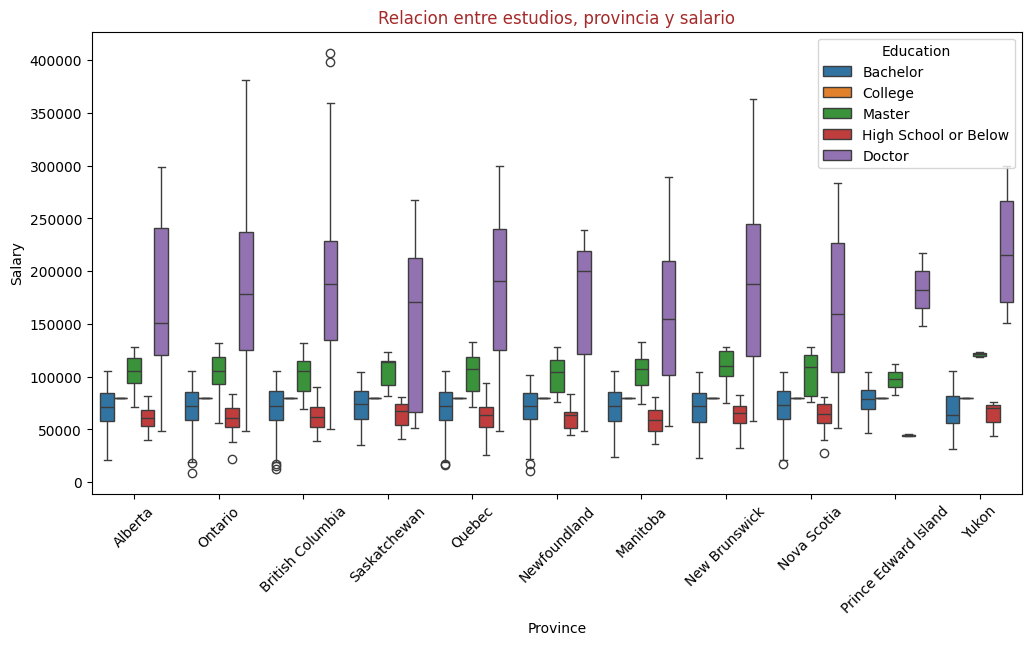

In [149]:
#Respecto a rellenar los nulos, busco relación entre el salario y otra columna. Miro sus estudios y su provincia.
plt.figure(figsize=(12, 6))

sns.boxplot(x= "Province", y= "Salary",hue="Education", data= df);
plt.xticks(rotation=45)
plt.title('Relacion entre estudios, provincia y salario', color= "brown")
plt.show

#### Según la gráfica veo que los que más cobran son los doctores, seguidos de los Master y después los que tienen el Instituto o menos estudios. 
#### Resulta llamativo que COLLEGE no aparece, es decir, no tiene ningun salario asociado.
#### Respecto a la provincia, se aprecia que en algunas cobran más que en otras, aunque las medias son bastante similares en general excepto en Prince Edward Island y Yukon.
#### Todo esto no resulta concluyente de cara a la gestión de nulos, ya que aparte de estas relaciones podría tener que ver la edad, si es hombre o mujer y los años de experiencia, entre otros factores.

In [89]:
#Ahora saco la media y la mediana por sí solas y calculo su diferencia:
print(f"La media de Salary, que tiene 25% de nulos, es:\n{df['Salary'].mean().round(2)}")
print(f"\nY su mediana es:\n{df['Salary'].median()}")

Resta= (df['Salary'].mean().round(2)) - (df['Salary'].median()) 
print(f"\nLa diferencia entre la media y la mediana es de: {int(Resta.round())}")

La media de Salary, que tiene 25% de nulos, es:
79381.44

Y su mediana es:
73479.0

La diferencia entre la media y la mediana es de: 5902


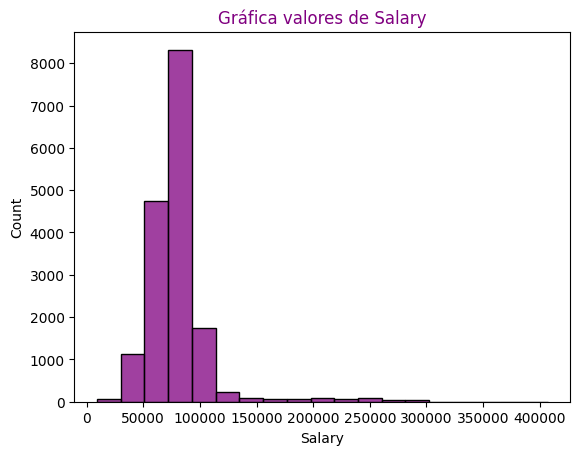

In [151]:
#Por ahora veo que hay pocos valores faltantes y la media y la mediana no son muy dispares.
#Miro sus valores atípicos mediante un histograma, para confirmar los que ya parecen ser de tamaño medio en la desviación estándar y el boxplot anterior.

sns.histplot(data=df, x="Salary", bins= 19, color= "purple");
plt.title("Gráfica valores de Salary", color= "purple")
plt.show()

In [91]:
#Recuerdo el numero exacto de nulos de esta columna
df["Salary"].isnull().sum()

102672

In [92]:
#Relleno nulos en una columna nueva con IterativeImputer, para posteriormente comparar
imputer= IterativeImputer(max_iter=20, random_state=42)
imputado_itimp= imputer.fit_transform(df[["Salary"]]) 
df["Salary_imp"] = imputado_itimp.round()

In [93]:
#Descubro que los valores del IterativeImputer (79381.0) son prácticamente iguales a la media(79381.44), lo que tiene sentido.
df.sample(3)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Salary_imp
298672,834571,2018,5,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Male,Bachelor,61305.0,Divorced,Nova,3954.54,Standard,2014,11,NaN,NaN,61305.0
136287,428872,2018,4,0,0,0,0,0.0,0,0,Canada,British Columbia,Whistler,V6T 1Y8,Female,Bachelor,55407.0,Married,Star,5320.61,Standard,2014,6,2015.0,3.0,55407.0
117170,382149,2017,3,8,0,8,1416,141.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Male,Bachelor,50141.0,Married,Star,6532.01,Standard,2013,12,NaN,NaN,50141.0


In [94]:
#Me quedo con la columna de Salary_imp
df.drop("Salary", axis= 1, inplace= True) #quito salary
df= df.rename(columns= {"Salary_imp": "Salary"}) #cambio el nombre de salary_imp a salary
df.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month', 'Salary'],
      dtype='object')

In [95]:
#Por ultimo compruebo cuántos nulos tengo ahora
df["Salary"].isnull().sum()

0

##### COLUMNAS CANCELLATION MONTH Y CANCELLATION YEAR (Ambas con un 87.66% de nulos)

In [96]:
#Además de tener el mismo porcentaje de nulos, compruebo si son precisamente los mismos registros:

In [97]:
#Miro no nulos de una columna, para comparar con la de cancellation year
nonulos_mes= df["Cancellation Month"].notnull()

df_condic0= df[nonulos_mes]
df_condic0.sample(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Salary
149538,461325,2018,7,0,0,0,0,0.0,0,0,Canada,Quebec,Montreal,H2T 2J6,Female,Bachelor,Single,Star,8444.84,Standard,2013,4,2014.0,8.0,87777.0
402681,909262,2017,10,6,4,10,2220,222.0,0,0,Canada,British Columbia,Vancouver,V6E 3Z3,Male,College,Divorced,Aurora,7863.03,Standard,2015,11,2018.0,5.0,79381.0
122197,395512,2018,2,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V6E 3Z3,Male,Bachelor,Married,Star,4091.93,Standard,2015,2,2015.0,10.0,60219.0
18808,144702,2018,5,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Male,Bachelor,Married,Star,4163.04,Standard,2013,7,2015.0,10.0,63574.0
356366,984968,2018,3,0,0,0,0,0.0,0,0,Canada,Ontario,Trenton,K8V 4B2,Female,College,Single,Star,9015.92,Standard,2016,1,2016.0,8.0,79381.0
393633,612013,2017,10,0,0,0,0,0.0,0,0,Canada,Quebec,Montreal,H2T 9K8,Male,Bachelor,Single,Nova,4455.52,Standard,2017,6,2018.0,2.0,54734.0
199638,585495,2017,7,0,0,0,0,0.0,0,0,Canada,Quebec,Montreal,H2T 2J6,Female,Master,Married,Aurora,11981.98,Standard,2014,5,2015.0,1.0,106899.0
259185,735171,2017,10,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Female,Bachelor,Married,Nova,6410.97,Standard,2014,6,2015.0,2.0,77062.0
400462,837646,2018,11,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M2M 6J7,Female,College,Single,Aurora,5121.56,Standard,2014,3,2018.0,4.0,79381.0
120579,391091,2017,4,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P2T 6G3,Female,College,Single,Nova,10196.11,Standard,2013,5,2014.0,6.0,79381.0


In [98]:
#Miro nulos de una columna, para comparar con la otra
nulos_mes= df["Cancellation Month"].isnull()

df_condic= df[nulos_mes]
df_condic.sample(3)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Salary
52117,225087,2018,3,11,0,11,2893,361.25,0,0,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,Single,Nova,8029.39,Standard,2012,9,NaN,NaN,102791.0
165133,499346,2018,2,0,0,0,0,0.00,0,0,Canada,Ontario,Toronto,P1J 8T7,Female,Bachelor,Divorced,Nova,3230.58,Standard,2018,6,NaN,NaN,77914.0
273940,771667,2017,5,3,0,3,288,28.00,0,0,Canada,Quebec,Montreal,H2T 2J6,Male,Bachelor,Married,Nova,7078.95,Standard,2014,4,NaN,NaN,48899.0


In [99]:
#Parece que sí son los mismos nulos en ambas columnas.
# Compruebo ahora numero de duplicados por columna (Cancellation Year y Month tienen casi los mismos, pero no son iguales!)

for col in df.columns:
    print(f"La columna- {col} -tiene este num de duplicados:")
    print(df[col].duplicated().sum())
    print(f"de {df.shape[0]} filas.\n")

La columna- Loyalty Number -tiene este num de duplicados:
388887
de 405624 filas.

La columna- Year -tiene este num de duplicados:
405622
de 405624 filas.

La columna- Month -tiene este num de duplicados:
405612
de 405624 filas.

La columna- Flights Booked -tiene este num de duplicados:
405602
de 405624 filas.

La columna- Flights with Companions -tiene este num de duplicados:
405612
de 405624 filas.

La columna- Total Flights -tiene este num de duplicados:
405591
de 405624 filas.

La columna- Distance -tiene este num de duplicados:
400878
de 405624 filas.

La columna- Points Accumulated -tiene este num de duplicados:
404075
de 405624 filas.

La columna- Points Redeemed -tiene este num de duplicados:
405037
de 405624 filas.

La columna- Dollar Cost Points Redeemed -tiene este num de duplicados:
405575
de 405624 filas.

La columna- Country -tiene este num de duplicados:
405623
de 405624 filas.

La columna- Province -tiene este num de duplicados:
405613
de 405624 filas.

La columna- City

### Antes de seguir con estas dos columnas, decido quitar los duplicados de una columna en la que tendría que tener valores únicos, que es Loyalty Number. Entiendo que es el ID de cada cliente, por lo que necesitaré que sea único para futuros cálculos.

In [100]:
#Miro algunos de sus valores duplicados con value counts, que me indica su frecuencia:
df["Loyalty Number"].value_counts()

Loyalty Number
678205    72
989528    48
373638    48
684889    48
684881    48
          ..
428526    24
428536    24
428565    24
428590    24
999891    24
Name: count, Length: 16737, dtype: int64

In [101]:
#Compruebo diferentes numeros con un filtro, para descubrir qué duplicado tiene más información
df[df["Loyalty Number"]== 428526]

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Salary
135984,428526,2017,1,12,3,15,3105,310.00,0,0,Canada,Ontario,Toronto,P2T 6G3,Male,College,Married,Nova,7374.08,Standard,2018,11,NaN,NaN,79381.0
135985,428526,2017,2,0,0,0,0,0.00,0,0,Canada,Ontario,Toronto,P2T 6G3,Male,College,Married,Nova,7374.08,Standard,2018,11,NaN,NaN,79381.0
135986,428526,2017,3,0,0,0,0,0.00,0,0,Canada,Ontario,Toronto,P2T 6G3,Male,College,Married,Nova,7374.08,Standard,2018,11,NaN,NaN,79381.0
135987,428526,2017,4,0,0,0,0,0.00,0,0,Canada,Ontario,Toronto,P2T 6G3,Male,College,Married,Nova,7374.08,Standard,2018,11,NaN,NaN,79381.0
135988,428526,2017,5,0,0,0,0,0.00,0,0,Canada,Ontario,Toronto,P2T 6G3,Male,College,Married,Nova,7374.08,Standard,2018,11,NaN,NaN,79381.0
135989,428526,2017,6,0,0,0,0,0.00,0,0,Canada,Ontario,Toronto,P2T 6G3,Male,College,Married,Nova,7374.08,Standard,2018,11,NaN,NaN,79381.0
135990,428526,2017,8,0,0,0,0,0.00,0,0,Canada,Ontario,Toronto,P2T 6G3,Male,College,Married,Nova,7374.08,Standard,2018,11,NaN,NaN,79381.0
135991,428526,2017,9,15,0,15,2025,202.00,0,0,Canada,Ontario,Toronto,P2T 6G3,Male,College,Married,Nova,7374.08,Standard,2018,11,NaN,NaN,79381.0
135992,428526,2017,10,7,0,7,798,79.00,0,0,Canada,Ontario,Toronto,P2T 6G3,Male,College,Married,Nova,7374.08,Standard,2018,11,NaN,NaN,79381.0
135993,428526,2017,11,0,0,0,0,0.00,0,0,Canada,Ontario,Toronto,P2T 6G3,Male,College,Married,Nova,7374.08,Standard,2018,11,NaN,NaN,79381.0


#### En algunos casos, el primer registro es el más completo, en otros, el último y en otros el antepenúltimo.
#### Decido quedarme con el último registro, que considero será el actualizado.

In [102]:
# Borro todos los duplicados de Loyalty Number excepto la última fila
df = df.drop_duplicates(subset= "Loyalty Number", keep= "last")

In [103]:
#Compruebo duplicados
df["Loyalty Number"].duplicated().sum()

0

In [104]:
df["Cancellation Month"].isnull().sum()

14670

In [105]:
# Decido borrar las columnas de cancellation year y cancellation month, ya que no tengo ninguna forma de extraer la información de sus nulos. 
#Puede ser que no se haya cancelado la tarjeta o que no se hayan guardado los datos por cualquier problema.
# En cualquier caso, siendo una cifra tan alta, opino que cualquier otra gestión de nulos estaría sesgada.

df.drop(["Cancellation Month", "Cancellation Year"], axis= 1 , inplace=True)
df.sample(3)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Salary
195239,575571,2018,12,0,0,0,0,0.0,0,0,Canada,Quebec,Montreal,H4G 3T4,Male,Bachelor,Married,Star,6639.33,Standard,2016,1,85076.0
330503,919338,2018,12,0,0,0,0,0.0,0,0,Canada,Quebec,Montreal,H2T 9K8,Male,Bachelor,Married,Aurora,14510.44,Standard,2017,8,62225.0
168119,506418,2018,12,17,0,17,3587,358.0,0,0,Canada,British Columbia,Whistler,V6T 1Y8,Male,Bachelor,Divorced,Aurora,7072.93,2018 Promotion,2018,3,98168.0


In [106]:
print(f"Ahora tengo las siguientes columnas: \n {df.columns}")
print(f"\nMi dataframe tiene {df.shape[1]} columnas.")

Ahora tengo las siguientes columnas: 
 Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Salary'],
      dtype='object')

Mi dataframe tiene 23 columnas.


### Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.

In [107]:
#Creo una funcion para cambiar el nombre de las columnas de forma que tengan un guion donde ahora hay espacios en blanco, ya que el expacio podría generar confusión o error:

def quitar_espacios_col(dataframe):

    for _ in dataframe.columns:
        dataframe.columns= dataframe.columns.str.replace(" ", "_")

In [108]:
#Llamo a la función y compruebo que esté todo cambiado.
quitar_espacios_col(df)
df.columns

Index(['Loyalty_Number', 'Year', 'Month', 'Flights_Booked',
       'Flights_with_Companions', 'Total_Flights', 'Distance',
       'Points_Accumulated', 'Points_Redeemed', 'Dollar_Cost_Points_Redeemed',
       'Country', 'Province', 'City', 'Postal_Code', 'Gender', 'Education',
       'Marital_Status', 'Loyalty_Card', 'CLV', 'Enrollment_Type',
       'Enrollment_Year', 'Enrollment_Month', 'Salary'],
      dtype='object')

In [109]:
#Exploro la columna Country 
print(f"El unico valor  de Country es: {df.Country.unique()}")
print(f"Su numero de nulos es: {df.Country.isnull().sum()}")


El unico valor  de Country es: ['Canada']
Su numero de nulos es: 0


In [110]:
#Decido quitarla ya que no aporta información relevante actualmente.
df.drop("Country", axis= 1 , inplace=True)
df.columns

Index(['Loyalty_Number', 'Year', 'Month', 'Flights_Booked',
       'Flights_with_Companions', 'Total_Flights', 'Distance',
       'Points_Accumulated', 'Points_Redeemed', 'Dollar_Cost_Points_Redeemed',
       'Province', 'City', 'Postal_Code', 'Gender', 'Education',
       'Marital_Status', 'Loyalty_Card', 'CLV', 'Enrollment_Type',
       'Enrollment_Year', 'Enrollment_Month', 'Salary'],
      dtype='object')

#### 2.3 Realizar cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadístico.

In [111]:
#Observo de nuevo mis tipos de columna, para ver si tienen sentido:
df.dtypes

Loyalty_Number                   int64
Year                             int64
Month                            int64
Flights_Booked                   int64
Flights_with_Companions          int64
Total_Flights                    int64
Distance                         int64
Points_Accumulated             float64
Points_Redeemed                  int64
Dollar_Cost_Points_Redeemed      int64
Province                        object
City                            object
Postal_Code                     object
Gender                          object
Education                       object
Marital_Status                  object
Loyalty_Card                    object
CLV                            float64
Enrollment_Type                 object
Enrollment_Year                  int64
Enrollment_Month                 int64
Salary                         float64
dtype: object

In [112]:
#Mantengo Points_Accumulated como float porque tengo valores en decimales.
df["Points_Accumulated"].unique()

array([494.  , 243.  ,   0.  , 359.  , 118.  , 117.  , 272.  , 219.  ,
        34.  , 168.  ,  75.  , 233.  , 298.  , 172.  ,  73.  , 372.  ,
       140.  , 427.  , 244.  , 165.  , 282.  , 262.  , 422.  ,  51.  ,
       120.  , 139.  , 396.  , 345.  , 380.  , 205.  , 208.  , 104.  ,
       290.  , 111.  , 308.  , 441.  , 464.  , 149.  , 274.  , 232.  ,
       387.  , 176.  , 214.  ,  44.  , 368.  , 360.  ,  77.  , 370.  ,
       180.  , 393.  , 181.  , 445.  , 426.  , 357.  ,  30.  , 339.  ,
       338.  , 402.  , 210.  , 327.  , 430.  , 131.  , 337.  , 115.  ,
       286.  , 132.  , 240.  , 222.  , 251.  ,  99.  ,  67.  , 391.  ,
       254.  , 386.  , 350.  , 159.  , 209.  , 292.  , 332.  , 343.  ,
        71.  , 106.  , 312.  , 288.  , 341.  ,  83.  , 189.  , 109.  ,
       508.  , 185.  ,  85.  , 289.  , 340.  , 311.  , 123.  ,  54.  ,
       156.  , 476.  , 448.  , 246.  ,  59.  , 183.  , 163.  , 277.  ,
       348.  , 105.  , 247.  , 171.  , 307.  , 153.  , 408.  ,  55.  ,
      

In [113]:
#Miro los tipos de matriculacion y su cantidad
display(pd.DataFrame(df["Enrollment_Type"].value_counts()))

,count
Enrollment_Type,
Standard,15766
2018 Promotion,971


In [114]:
#Ningún valor de la columna Salary tiene decimales:
df["Salary"].unique()

array([92552., 79381., 63253., ..., 23160., 97206., 56345.])

In [115]:
#Decido convertirla en integer para mayor practicidad.
df["Salary"]= df["Salary"].astype(int)
df["Salary"].dtype #compruebo el cambio

dtype('int64')

In [116]:
#Guardo mi csv con los datos limpios.
df.to_csv("customer_clean_data.csv")

## _Fase 2: Visualización_
### Usando las herramientas de visualización, contestar a las siguientes gráficas usando la mejor gráfica que consideres:
2.1- ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [117]:
df.columns

Index(['Loyalty_Number', 'Year', 'Month', 'Flights_Booked',
       'Flights_with_Companions', 'Total_Flights', 'Distance',
       'Points_Accumulated', 'Points_Redeemed', 'Dollar_Cost_Points_Redeemed',
       'Province', 'City', 'Postal_Code', 'Gender', 'Education',
       'Marital_Status', 'Loyalty_Card', 'CLV', 'Enrollment_Type',
       'Enrollment_Year', 'Enrollment_Month', 'Salary'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

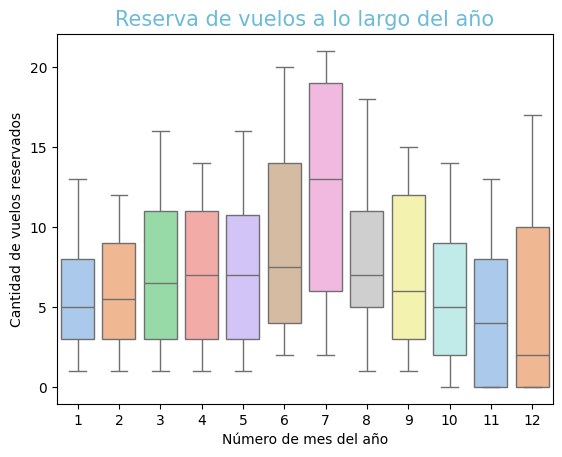

In [118]:
#Con este boxplot se puede deducir que se reservan más vuelos en los meses 6, 7, 8 y 12, lo que tiene bastante sentido, ya que son junio, julio, agosto y diciembre.

sns.boxplot(x="Month", y= "Flights_Booked", data= df , palette= "pastel")
plt.title("Reserva de vuelos a lo largo del año", color= '#6BBBD9', fontsize= 15)
plt.xlabel("Número de mes del año")
plt.ylabel("Cantidad de vuelos reservados")
plt.show

2.2- ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

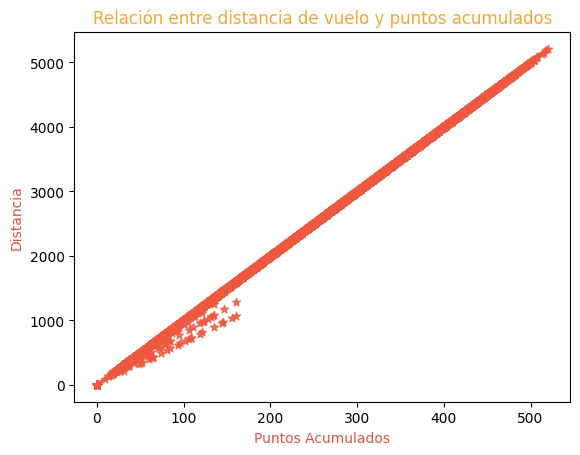

In [119]:
#Como se puede apreciar en este regplot, hay una relación directa y aparentemente, con poca dispersion. A más distancia, más puntos acumulados.

sns.regplot(x= "Points_Accumulated", y= "Distance", data=df, marker= "*", color= "#ED583F");

plt.title("Relación entre distancia de vuelo y puntos acumulados", color= "#F3A732" )
plt.xlabel("Puntos Acumulados", color= "#DD5341")
plt.ylabel("Distancia",  color= "#DD5341")

plt.show()


#### 2.3. ¿Cuál es la distribución de los clientes por provincia o estado?

<function matplotlib.pyplot.show(close=None, block=None)>

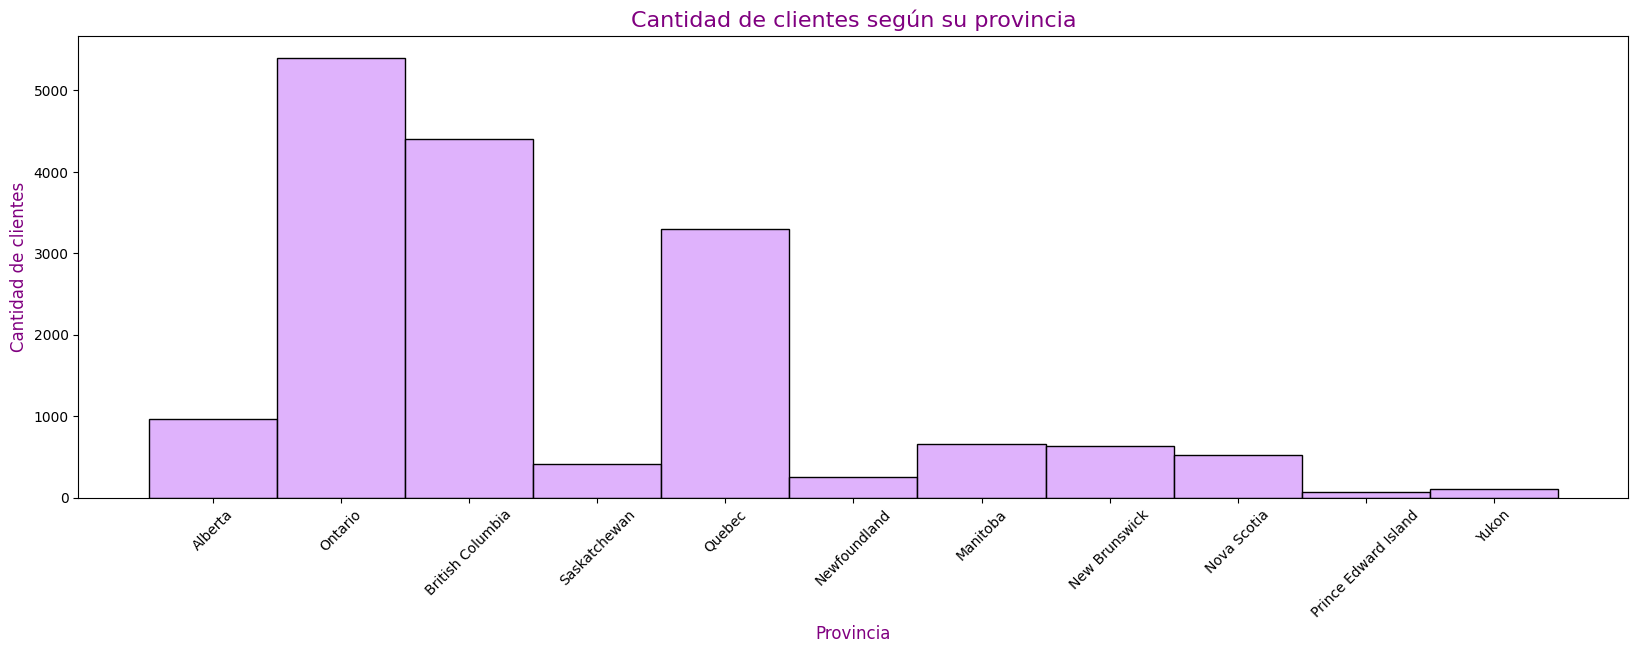

In [120]:
#Con un histograma es posible ver claramente la cantidad de clientes según la provincia, siendo la principal Ontario y seguida por British Columbia y Quebec.

plt.figure(figsize=(20, 6))
sns.histplot(data=df, x="Province", bins= 19, color= "#D599FB");

plt.xticks(rotation=45)
plt.title("Cantidad de clientes según su provincia", fontsize= 16, color= "purple")
plt.xlabel("Provincia", fontsize=12, color= "purple")
plt.ylabel("Cantidad de clientes", fontsize=12, color= "purple")
plt.show

#### 2.4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?


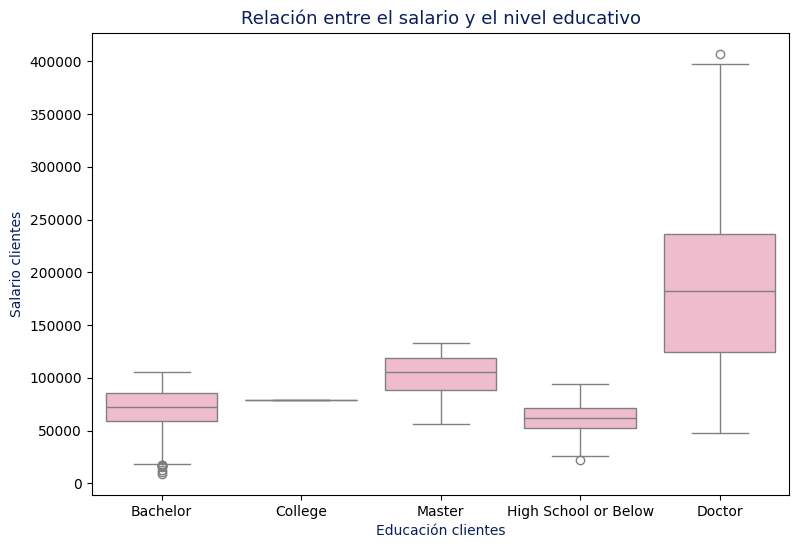

In [121]:
#Para comparar estas columnas categórica y numérica, uso boxplot, en la que se puede ver claramente la tendencia central y la distribución de salario según nivel de estudios.
#En el centro de las cajas, la linea marca la mediana

plt.figure(figsize=(9, 6))
sns.boxplot(x= "Education",y="Salary",  data= df, color="#F8B3CC")
plt.title("Relación entre el salario y el nivel educativo", fontsize= 13, color= "#081F5C")
plt.xlabel("Educación clientes", color="#081F5C" )
plt.ylabel("Salario clientes", color="#081F5C" )
plt.show()

Encontramos el salario promedio en la linea que se encuentra en el centro de cada caja. 
Por lo tanto, podemos observar que el salario promedio más elevado es el del nivel educativo "Doctor".
Después encontramos "Master", "College" y "Bachelor", con diferentes medias aunque sin ser excesivamente pronunciadas.
Y por último, High School or Below, que corresponde a aquellas personas con menos estudios y por lo tanto, son los que cuentan con la menor media de todos.


#### 2.5 ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [122]:
#Compruebo que la columna es categórica, con los 3 tipos de tarjeta disponibles:
df["Loyalty_Card"].unique()

array(['Aurora', 'Nova', 'Star'], dtype=object)

In [123]:
#Decido hacer un gráfico de quesitos. 
#Para ello, primero agrupo las tarjetas por clientes, creando un nuevo dataframe.
df_tarjetas= df.groupby("Loyalty_Card")["Loyalty_Number"].count().reset_index()


In [124]:
#Compruebo resultados:
df_tarjetas

,Loyalty_Card,Loyalty_Number
0,Aurora,3429
1,Nova,5671
2,Star,7637


In [125]:
#Renombro, para no dar espacio a confusión de lo que es cada columna
df_tarjetas.columns= ["Loyalty_Card", "Quantity"]
df_tarjetas

,Loyalty_Card,Quantity
0,Aurora,3429
1,Nova,5671
2,Star,7637


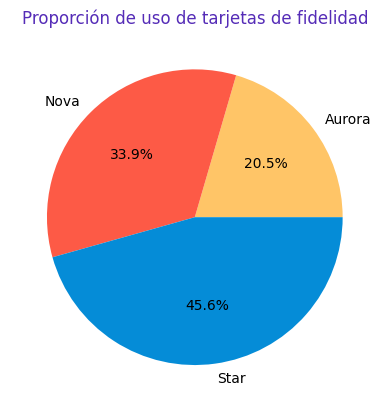

In [126]:
#Creo mi pieplot, donde le digo la cantidad (quantity) y la columna donde tengo las categorías(labels), que es loyalty_card:
colores= ["#FFC567", "#FD5A46", "#058CD7"]
plt.pie(df_tarjetas["Quantity"], labels= df_tarjetas["Loyalty_Card"], autopct='%1.1f%%', colors=colores); #autopct muestra los valores en porcentajes
plt.title("Proporción de uso de tarjetas de fidelidad", color="#552CB7")
plt.show()



#### 2.6 ¿Cómo se distribuyen los clientes según su estado civil y género?

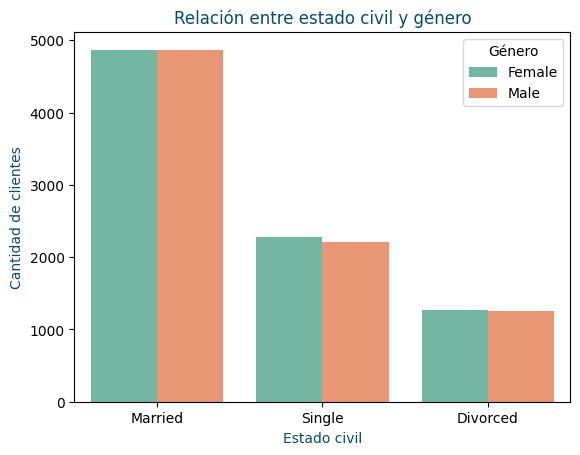

In [127]:
#Uso el gráfico countplot para comparar ambas columnas categóricas y su cantidad.

sns.countplot(x="Marital_Status", data=df, hue= "Gender", palette="Set2");
plt.title("Relación entre estado civil y género", color= "#064c72")
plt.xlabel("Estado civil", color= "#064c72")
plt.ylabel("Cantidad de clientes", color= "#064c72")
plt.legend(title= "Género")

plt.show()

#### A simple vista se puede entender que la mayoría de los clientes están casados, el siguiente grupo son los solteros y finalmente los divorciados.También podemos deducir que no hay diferencias significativas en cuanto al estado civil y el género, ya que tanto hombres como mujeres parecen encontrarse en igual proporción en cada categoría de estado civil.


## _Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo_
### 3.1. Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.


In [128]:
#Filtro los datos para quedarme con las columnas relevantes
df_filtered= df.loc[:,["Flights_Booked", "Education"]]

In [129]:
#Compruebo
df_filtered.sample(8)

,Flights_Booked,Education
1487,0,Bachelor
22943,1,Bachelor
249959,0,High School or Below
163679,0,College
265847,2,Bachelor
298607,0,College
50039,6,College
276719,4,Bachelor


### 3.2. Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del número de vuelos reservados para cada grupo.


In [130]:
#Agrupo según la categoría del nivel educativo y saco las estadísticas básicas de los vuelos reservados según el nivel de estudios.
df_filtered.groupby("Education")["Flights_Booked"].describe()

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Bachelor,10475.0,4.996181,5.631107,0.0,0.0,3.0,10.0,21.0
College,4238.0,5.105946,5.704414,0.0,0.0,3.0,10.0,21.0
Doctor,734.0,4.824251,5.654240,0.0,0.0,2.0,10.0,20.0
High School or Below,782.0,5.176471,5.786165,0.0,0.0,3.0,11.0,20.0
Master,508.0,5.395669,5.596468,0.0,0.0,4.0,10.0,19.0


#### 3.3/ 11. Prueba Estadística: Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

OBJETIVO: Saber si el nivel educativo afecta a la reserva de vuelos.
 1) Hipótesis nula: NO hay una diferencia significativa entre el nivel de estudios y la reserva de vuelos.
 2) Hipótesis alternativa: SI hay una diferencia significativa entre el nivel de estudios y la reserva de vuelos.


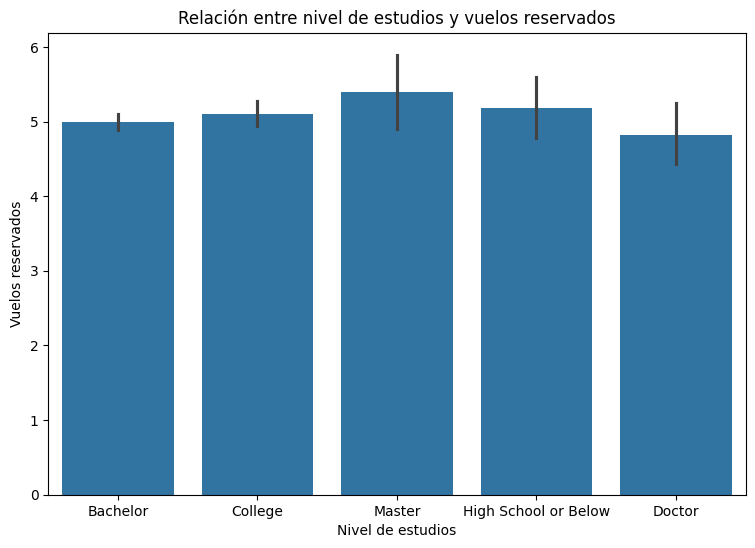

In [131]:
#Primero visualizo. Superficialmente, veo que los que tienen estudios de Master parecen reservar más vuelos que el resto.
#Esta revisión visual no es concluyente, ya que las diferencias no son muy significativas de primeras. 
plt.figure(figsize=(9, 6))
sns.barplot(x="Education", y="Flights_Booked", data=df);
plt.title("Relación entre nivel de estudios y vuelos reservados")
plt.xlabel("Nivel de estudios")
plt.ylabel("Vuelos reservados")

plt.show()

Ahora quiero encontrar la tasa de reservas, es decir, la proporción de personas que han reservado al menos un vuelo según su nivel educativo.

In [134]:
# Creo nueva columna Booked con todos los registros que tienen algún vuelo reservado
df_filtered["Booked"] = df_filtered["Flights_Booked"] > 0

In [135]:
#Ahora guardo los dos estadísticos de cuenta y suma de la columna Booked que he creado en el paso anterior, siempre agrupados según el nivel de estudios.
estadistics= df_filtered.groupby("Education")["Booked"].agg(['count', 'sum'])

estadistics

,count,sum
Education,,
Bachelor,10475,5991
College,4238,2448
Doctor,734,408
High School or Below,782,458
Master,508,318


In [136]:
#Ahora puedo calcular los porcentajes de vuelos reservados por nivel educativo
percent= (estadistics["sum"] / estadistics["count"]) * 100
percent.sort_values(ascending=False) #Los ordeno para ver mejor los resultados. 

#De nuevo "Master" queda en cabeza, y compruebo que el resto de niveles están bastante cerca los unos de los otros. 
#Esto de nuevo me lleva a no encontrar una diferencia significativa, manteniendo la Hipótesis Nula.

Education
Master                  62.598425
High School or Below    58.567775
College                 57.763096
Bachelor                57.193317
Doctor                  55.585831
dtype: float64

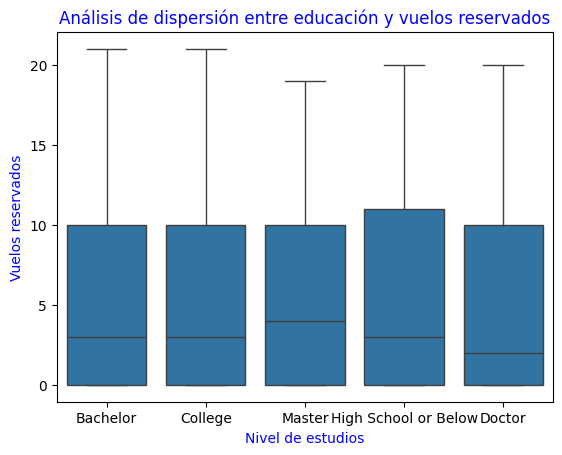

In [137]:
#Ahora creo un boxplot para ver los outliers, que según vimos en los estadísticos antes, parecen pronunciados en algunas categorías:
#Los bigotes muestran la existencia de outliers, lo que indica que los datos podrían estar sesgados.

sns.boxplot(x="Education", y= "Flights_Booked", data=df_filtered);
plt.title("Análisis de dispersión entre educación y vuelos reservados", color= "blue")
plt.xlabel("Nivel de estudios", color= "blue")
plt.ylabel("Vuelos reservados", color= "blue")
plt.show()

In [138]:
#Para una mayor comprobación, reviso los estadísticos juntos con la gráfica.
# La variación estándar supera a las medias, lo que demuestra una dispersión relativamente grande en la mayoría de los casos.
#Esto podría ser una diferencia significativa, pero son necesarios más estudios.

df_filtered.groupby("Education")["Flights_Booked"].agg(["mean", "std", "var"])

,mean,std,var
Education,,,
Bachelor,4.996181,5.631107,31.709361
College,5.105946,5.704414,32.540342
Doctor,4.824251,5.654240,31.970434
High School or Below,5.176471,5.786165,33.479702
Master,5.395669,5.596468,31.320455


In [148]:
#Borro la columna Booked, porque no la usaré a continuación.
df_filtered.drop("Booked", axis=1)

,Flights_Booked,Education
23,17,Bachelor
47,14,College
71,0,College
95,10,Bachelor
119,0,Bachelor
...,...,...
405527,0,College
405551,0,College
405575,0,Bachelor
405599,0,Bachelor


In [140]:
#Hago la prueba de Shapiro-Wilk para ver si los datos siguen una distribución normal.

"""
Creo una lista vacia e itero sobre
· name= La categoría de cada nivel educactivo.
· group= los datos asociados a esa categoría.
Guardo todos los resultados de group de las iteraciones en mi lista vacia.
""" 
data_by_education = []
for name, group in df_filtered.groupby('Education'):
        data_by_education.append(group['Flights_Booked'])


# Aplico la prueba de Shapiro-Wilk a cada conjunto de datos de vuelos reservados en cada nivel educativo. 
shapiro_results = [shapiro(data) for data in data_by_education]

"""
Como los resultados de Shapiro son por cada nivel educativo, debo iterar sobre ellos para saber su p_value.
·i = Es el índice de cada bloque de resultados (categoría y datos asociados)

Uso el método enumerate para que me devuelva la agrupación con el índice, nivel de estudios y datos.
"""
for i, (name, _) in enumerate(df_filtered.groupby('Education')):
    print(f"Resultados para la categoría '{name}':")
    stat, p_value = shapiro_results[i]
    if p_value > 0.05:
        print("Los datos parecen tener una distribución normal. Se mantiene la hipótesis nula.\n")
    else:
        print("Los datos NO parecen seguir una distribución normal. Se opta por la Hipótesis Alternativa. \n")

#Aquí todas las categorías indican que SI hay una diferencia significativa.


Resultados para la categoría 'Bachelor':
Los datos NO parecen seguir una distribución normal. Se opta por la Hipótesis Alternativa. 

Resultados para la categoría 'College':
Los datos NO parecen seguir una distribución normal. Se opta por la Hipótesis Alternativa. 

Resultados para la categoría 'Doctor':
Los datos NO parecen seguir una distribución normal. Se opta por la Hipótesis Alternativa. 

Resultados para la categoría 'High School or Below':
Los datos NO parecen seguir una distribución normal. Se opta por la Hipótesis Alternativa. 

Resultados para la categoría 'Master':
Los datos NO parecen seguir una distribución normal. Se opta por la Hipótesis Alternativa. 



In [147]:
# Aplico la prueba de Levene entre los grupos para ver la homogeneidad de varianzas

groups = [] 
"""
Creo la lista groups para meter cada categoría del nivel de estudios.
Con el bucle for itero sobre cada nivel educativo que creo agrupando por Education.

· study_level- Valor educativo de cada grupo (o cada categoría).
· groups_data- El dataframe con los datos del nivel educativo seleccionado en cada iteración.
· groups_data["Flights_Booked] : Selecciona esta columna, que contiene 
                                 el número de vuelos reservados para cada nivel educativo.
· .values- Convierte los valores de la columna en una lista de arrays.
· groups.append(vuelos_reservados)- Guarda cada relación de vuelos reservados por nivel educativo.
"""

for educ_level, groups_data in df_filtered.groupby('Education'):
    vuelos_reservados = groups_data['Flights_Booked'].values
    groups.append(vuelos_reservados)

"""
Aplico la prueba de Levene entre cada grupo.
Uso un asterisco antes de groups para que desempaquete los arrays 
y así la función Levene los coja como argumentos separados.
"""
estadistico_levene, p_value = levene(*groups)

if p_value < 0.05:
    print(f"El p_value es {p_value.round(2)}. Hay una diferencia significativa en las varianzas entre los grupos.")
else:
    print(f"El p_value es {p_value.round(2)}, por lo que NO hay una diferencia significativa en las varianzas entre los grupos.")
    print("Es decir, son HOMOGÉNEAS y la H0 se mantiene.")

#En este caso, NO hay diferencias significativas


El p_value es 0.56, por lo que NO hay una diferencia significativa en las varianzas entre los grupos.
Es decir, son HOMOGÉNEAS y la H0 se mantiene.


#### En base a las pruebas realizadas, todo parece indicar en que SÍ existe una diferencia significativa entre los vuelos reservados y el nivel de estudios de los clientes. 
#### La prueba de las varianzas da como resultado homogeneidad, lo que aún sin ser concluyente en sí mismo, sugiere que la diferencia en los vuelos reservados no se debe a variaciones en la dispersión de los datos entre los diferentes niveles educativos. 

#### Esto refuerza la idea de que el nivel de estudios podría estar influyendo en el número de vuelos reservados por los clientes.